In [1]:
#Importando Pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
# importando dados
url = 'C:\Projetos\egov\dados\dataset.xlsx'
df = pd.read_excel(url)

In [3]:
#Shape
df.shape

(17, 16)

In [4]:
#tipos de dados
df.dtypes

ano_coleta                        int64
despesas_educ_percent           float64
despesas_saude_per_capita       float64
despesas_educ_total             float64
despesas_saude_%pib             float64
receita_trib_%pib               float64
receita_excl_doa_%pib           float64
ibrd_e_ida                      float64
pop_cresc_anual%                float64
pib_cresc_per_capita_%pib       float64
pib_deflator                    float64
domestic_saude_despesas_%pib    float64
pib_cresc_anual%                float64
pib_cor_us$                     float64
despesa_nac_bruta_%pib          float64
pib_moeda_local                   int64
dtype: object

In [5]:
#Resumo estatistico
df.describe()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
count,17.000000,8.000000,15.000000,13.000000,15.000000,5.000000,5.000000,1.600000e+01,17.000000,17.000000,17.000000,15.000000,17.000000,1.700000e+01,17.000000,1.700000e+01
mean,2011.000000,34.776599,55.265036,20.844645,5.555868,16.008023,21.028661,3.667159e+09,2.606996,2.539702,117.186747,1.754343,5.247425,4.851720e+10,112.318030,4.387753e+12
std,5.049752,10.632141,17.077696,3.828826,0.412144,0.677579,0.944677,9.532678e+08,0.172462,1.798253,46.934509,0.249802,1.809246,2.477595e+10,2.112360,2.776122e+12
min,2003.000000,20.850740,25.437891,16.664660,4.802543,15.085142,19.620423,2.663224e+09,2.271902,-2.503373,51.824235,1.416008,0.232283,1.490452e+10,109.212364,1.131782e+12
25%,2007.000000,22.976598,45.630081,17.708700,5.266875,15.637825,20.616187,2.946771e+09,2.491937,2.283178,77.789734,1.522404,4.805697,3.195820e+10,110.429285,2.151349e+12
50%,2011.000000,41.763410,57.387424,19.252830,5.519421,16.183533,21.199592,3.313021e+09,2.693733,3.045012,113.111372,1.771546,5.718507,4.195343e+10,112.164729,3.725918e+12
75%,2015.000000,42.682555,69.282478,24.980090,5.935258,16.256635,21.738908,4.244785e+09,2.739229,3.346252,154.710423,1.950641,6.108264,6.400775e+10,114.066709,6.284185e+12
max,2019.000000,43.124180,76.610321,27.469340,6.116753,16.876979,21.968194,5.801797e+09,2.768560,5.494077,192.904792,2.148430,8.405699,9.550309e+10,116.218812,9.740360e+12


In [6]:
#Verificando Valores Ausentes
df.isnull().sum()

ano_coleta                       0
despesas_educ_percent            9
despesas_saude_per_capita        2
despesas_educ_total              4
despesas_saude_%pib              2
receita_trib_%pib               12
receita_excl_doa_%pib           12
ibrd_e_ida                       1
pop_cresc_anual%                 0
pib_cresc_per_capita_%pib        0
pib_deflator                     0
domestic_saude_despesas_%pib     2
pib_cresc_anual%                 0
pib_cor_us$                      0
despesa_nac_bruta_%pib           0
pib_moeda_local                  0
dtype: int64

#  <font color = "blue"> Limpeza e Processamento de Dados</font>

### Tratamento de valore Ausentes com Blackfilling e interpolação

In [7]:
df['receita_trib_%pib'].fillna(method = 'bfill', inplace = True)
df['receita_excl_doa_%pib'].fillna(method = 'bfill', inplace = True)
df = df.interpolate()


In [8]:
#verificando valores ausentes
df.isnull().sum()

ano_coleta                      0
despesas_educ_percent           0
despesas_saude_per_capita       0
despesas_educ_total             0
despesas_saude_%pib             0
receita_trib_%pib               0
receita_excl_doa_%pib           0
ibrd_e_ida                      0
pop_cresc_anual%                0
pib_cresc_per_capita_%pib       0
pib_deflator                    0
domestic_saude_despesas_%pib    0
pib_cresc_anual%                0
pib_cor_us$                     0
despesa_nac_bruta_%pib          0
pib_moeda_local                 0
dtype: int64

In [9]:
#Retirar Pib corrente em dolar
df= df.drop(columns = ['pib_cor_us$'])

In [10]:
#Arredondar valores cecimais para 4 casas

df=df.round(4)

In [11]:
#salva em CSV
df.to_csv('C:\Projetos\egov\dados\df.xlsx', index = False)

# Análise de Dados

In [12]:
# Carregando o DF preparado

Base = pd.read_csv('C:\Projetos\egov\dados\df.xlsx')

# 1 - Em que ano o país teve um alto crescimento do pib per capita?


In [13]:
Base.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


<AxesSubplot:xlabel='ano_coleta'>

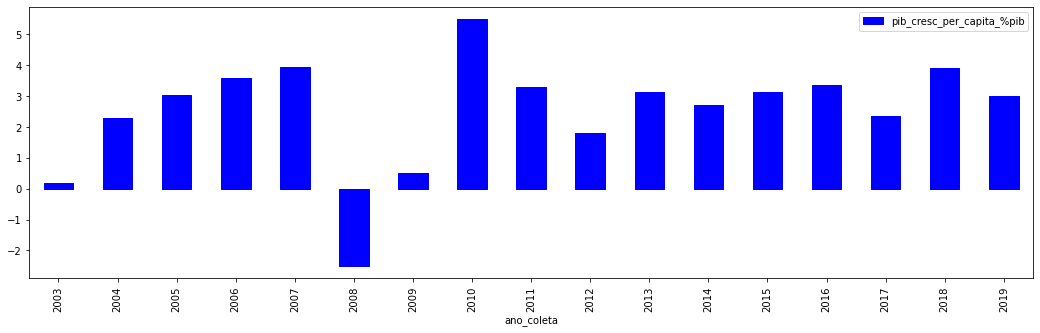

In [15]:
#Gráfico
Base.plot(x ='ano_coleta', 
          y=['pib_cresc_per_capita_%pib'],
          kind='bar',
          figsize=(18,5),
          Color='blue')

Resposta:Pelo gráfico acima vemos que foi o ano de 2010 o maior crescimento do PIB Per Capita no período analisado

# 2 - qual ano teve as marios despesas com saúde ?


In [16]:
#Visualizar dados
Base.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


In [17]:
#Calculando o gasto naciona bruto em relação ao PIB na moeda Local
Base['gasto_nac_bruto'] = Base['despesa_nac_bruta_%pib'] / 100 * Base['pib_moeda_local']

In [18]:
#calculando o gasto total dem saúde e crimamos em nova coluna
Base['gasto_saude'] = Base['domestic_saude_despesas_%pib'] / 100 * Base['gasto_nac_bruto']
Base.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_saude
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,1.882185e+10
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,1.991160e+10
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,2.318016e+10
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,2.965976e+10
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,3.681230e+10


<AxesSubplot:xlabel='ano_coleta'>

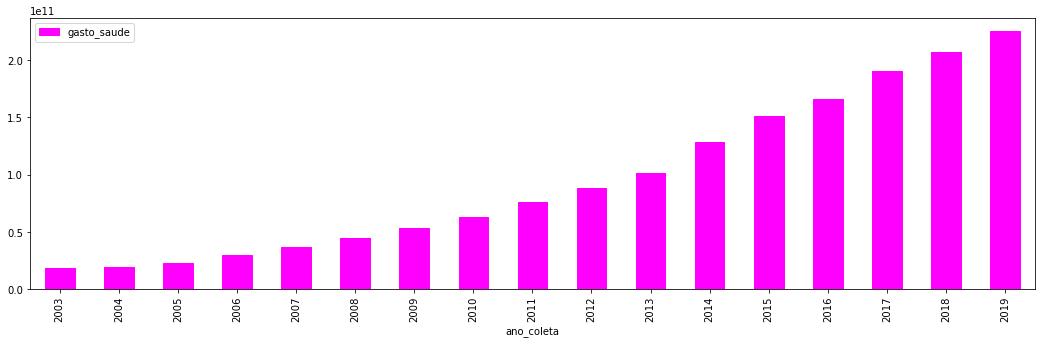

In [20]:
#Gráfico
Base.plot(x ='ano_coleta', 
          y=['gasto_saude'],
          kind='bar',
          figsize=(18,5),
          Color='magenta')

Resposta:Pelo gráfico acima vemos que foi o ano de 2019 o ano com mais gasto de saúde

# 3 - qual ano teve as marios despesas com educação ?


In [21]:
Base['gasto_educ'] = Base['despesas_educ_total'] / 100 * Base['gasto_nac_bruto']

<AxesSubplot:xlabel='ano_coleta'>

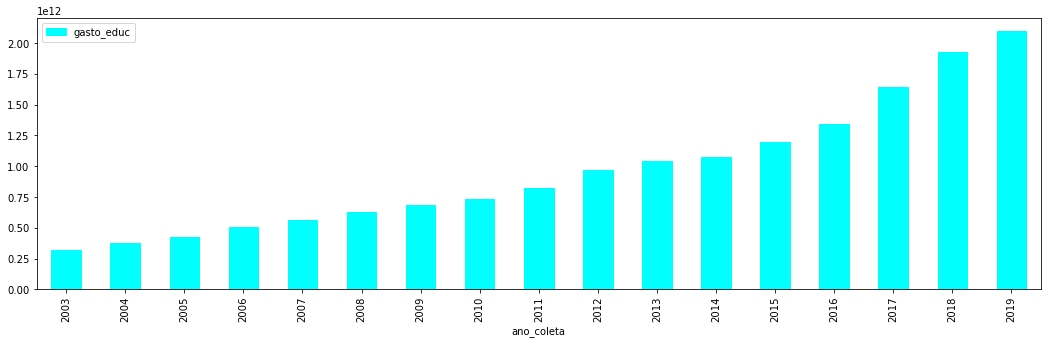

In [22]:
#Gráfico
Base.plot(x ='ano_coleta', 
          y=['gasto_educ'],
          kind='bar',
          figsize=(18,5),
          Color='cyan')

Resposta:Pelo gráfico acima vemos que foi o ano de 2019 o ano com mais gasto de Educação

# 4 - Como a Receita do governo se relaciona com a despesa ?

In [44]:
Base.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_saude,gasto_educ
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,1.882185e+10,3.158907e+11
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,1.991160e+10,3.750046e+11
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,2.318016e+10,4.294482e+11
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,2.965976e+10,5.100503e+11
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,3.681230e+10,5.664704e+11


<AxesSubplot:>

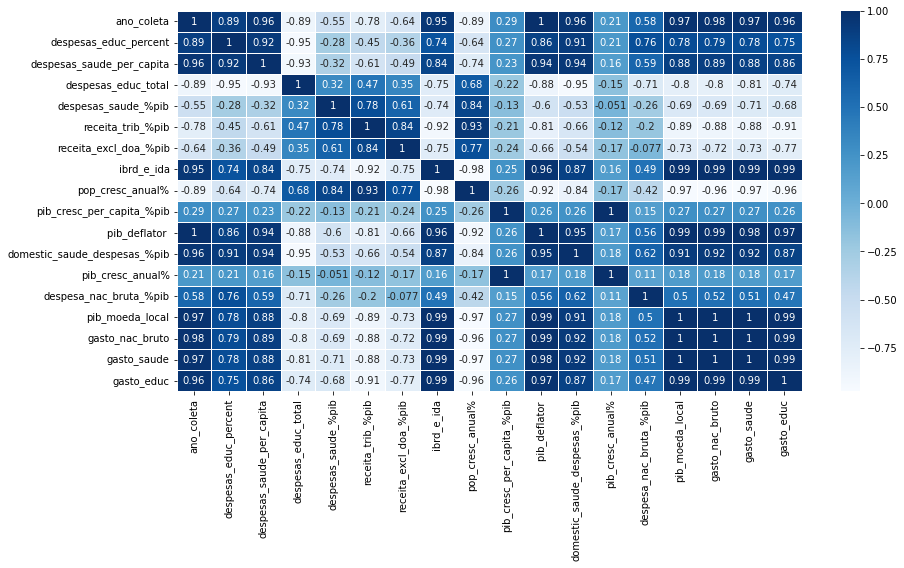

In [32]:
#calcula a correlação entre as variáveis no conjunto de dados usando o método de Pearson
df2= Base.corr(method = 'pearson')

#Definindo o tamanho do gráfico
plt.figure(figsize = (14,7))

#Visualizar a correlação com mapa de calor (Heatmap)
sb.heatmap(df2,
          xticklabels= df2.columns,
          yticklabels = df2.columns,
          cmap ='Blues',
          annot= True,
          linewidth=0.8)



A partir dos coeficientes da matriz de correlação acima, obtemos as seguintes informações:

<font color = "blue">Receita de Impostos</font>

* Despesas com saúde (despesas_saude_%pib) tem uma forte correlação com a receita tributária do governo (receita_trib_%pib). O coeficiente de correlação é <font color = "magenta"> + 0,78 </font>, o que indica que eles são diretamente proporcionais.


* Despesas com educação (despesas_educ_total) tem uma boa correlação com a receita tributária (receita_trib_%pib). O coeficiente de correlação é <font color = "magenta"> + 0,47 </font>, o que indica que são diretamente proporcionais, mas não da mesma forma que no setor saúde.

<font color = "blue">Receita de Empréstimos do BIRD e Créditos da AID</font>

* Despesas com saúde (despesas_saude_%pib) tem uma forte correlação com os empréstimos do BIRD e os créditos da AID (ibrd_e_ida). O coeficiente de correlação é <font color = "magenta"> + 0,74 </font>, o que indica que eles são diretamente proporcionais.


* As despesas com educação (despesas_educ_total) têm uma correlação significativamente forte com os empréstimos do BIRD e os créditos da AID (ibrd_e_ida). O coeficiente de correlação é <font color = "magenta"> + 0,75 </font>, o que indica que eles são diretamente proporcionais. Também indica que a educação é principalmente financiada por meio de empréstimos do BIRD e créditos da AID, em oposição à receita fiscal do governo.

# 5 - Como a Educação e a Saúde se Correlacionam com o Crescimento do PIB?

Usando a mesma matriz de correlação do item anterior, podemos concluir o seguinte:

* Despesas com educação (despesas_educ_total) tem uma correlação negativa com o crescimento do PIB per capita (pib_cresc_per_capita_%pib) ao longo dos anos com um coeficiente de <font color = "blue"> - 0,22 </font>. Isso pode ser atribuído principalmente à educação gratuita, portanto, levando a menores gastos com educação por parte dos cidadãos.


* Despesas com saúde (despesas_saude_%pib) também tem uma correlação negativa com o crescimento do PIB per cappita (pib_cresc_per_capita_%pib) em <font color = "blue"> - 0,05 </font>, o que significa que são levemente inversamente proporcionais. Isso se deve aos menores gastos gerais com saúde, principalmente devido aos preços mais baixos - incluindo preços mais baixos de medicamentos e salários mais baixos para médicos e enfermeiras.

# 6- Como os Gastos do Governo com Educação e Saúde Afetam o Crescimento do PIB?

In [34]:
# Visualiza os dados
Base.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_saude,gasto_educ
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,1.882185e+10,3.158907e+11
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,1.991160e+10,3.750046e+11
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,2.318016e+10,4.294482e+11
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,2.965976e+10,5.100503e+11
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,3.681230e+10,5.664704e+11


In [35]:
# Adicionando os gastos de saúde e educação
Base['total_gastos_educ_saude'] = Base['gasto_educ'] + Base['gasto_saude']
Base.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_saude,gasto_educ,total_gastos_educ_saude
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,1.882185e+10,3.158907e+11,3.347126e+11
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,1.991160e+10,3.750046e+11,3.949162e+11
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,2.318016e+10,4.294482e+11,4.526284e+11
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,2.965976e+10,5.100503e+11,5.397100e+11
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,3.681230e+10,5.664704e+11,6.032827e+11


<function matplotlib.pyplot.show(close=None, block=None)>

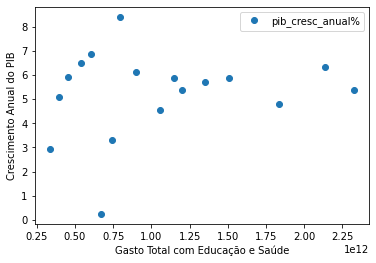

In [36]:
# Plot
Base.plot(x = 'total_gastos_educ_saude', y = 'pib_cresc_anual%', style = 'o')
plt.xlabel('Gasto Total com Educação e Saúde')
plt.ylabel('Crescimento Anual do PIB')
plt.show

In [37]:
# Construindo um modelo de regressão

# Prepara x e y
x = pd.DataFrame(Base['total_gastos_educ_saude'])
y = pd.DataFrame(Base['pib_cresc_anual%'])

# Cria e treina o modelo
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [38]:
modelo.coef_

array([[5.20791642e-13]])

Os resultados sugerem que os gastos do governo com educação e saúde afetam positivamente o crescimento do PIB.

Um aumento unitário nas despesas do governo leva a um aumento unitário de 5,20791642e-13 no crescimento do PIB.

## <font color = "red">7- Com Base na Análise Quais São as Recomendações aos Governantes e Gestores?</font>

Educação:

* O governo deve garantir o desenvolvimento do capital humano.
* Construir mais escolas, treinar e empregar mais professores para garantir uma educação de boa qualidade, tornando a educação acessível a todos e reduzindo o custo da educação. 
* Isso aumenta o desenvolvimento do capital humano e o crescimento do PIB no longo prazo. 

Saúde:

* O governo também pode continuar a fazer mais investimentos no setor de saúde, como a compra de equipamentos de saúde modernos, construção de mais hospitais, treinamento de mais profissionais de saúde e financiamento de pesquisa e desenvolvimento em saúde para combater epidemias.